# Notebook for preparing and saving GraphTheoryProp graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


/home/psoga/.virtualenvs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download GraphTheoryProp dataset
Actual source https://github.com/lukecavabarrett/pna

In [11]:
if not os.path.isfile('multitask_dataset.pkl'):
    print('downloading..')
    !curl https://www.dropbox.com/s/zdevjruk7k6yuqc/multitask_dataset.pkl?dl=1 -o multitask_dataset.pkl -J -L -k
else:
    print('File already downloaded')
    

downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145    0   145    0     0    559      0 --:--:-- --:--:-- --:--:--   559
100   363  100   363    0     0    649      0 --:--:-- --:--:-- --:--:--   649
100 12.3M  100 12.3M    0     0  5038k      0  0:00:02  0:00:02 --:--:-- 10.9M


# Convert to DGL format and save with pickle

In [6]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/home/psoga/Documents/projects/benchmarking-gnns


In [7]:
import pickle

%load_ext autoreload
%autoreload 2

from data.graphtheoryprop import GraphTheoryPropDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.graphtheoryprop import GraphTheoryPropDataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using backend: pytorch


In [8]:
DATASET_NAME = 'GraphTheoryProp'
dataset = GraphTheoryPropDatasetDGL(DATASET_NAME) 

preparing graphs for the TRAIN set...


/home/psoga/.virtualenvs/gnn/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


preparing graphs for the VAL set...
preparing graphs for the TEST set...
Time taken: 2.7954s


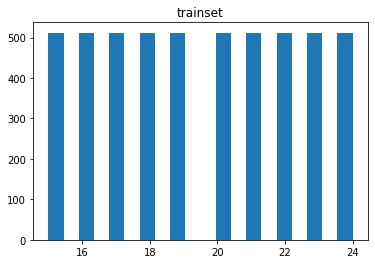

min/max : 15 24


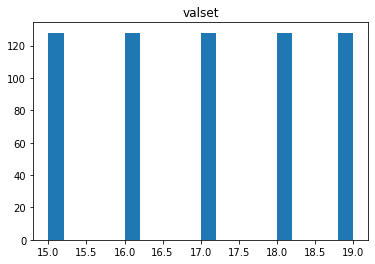

min/max : 15 19


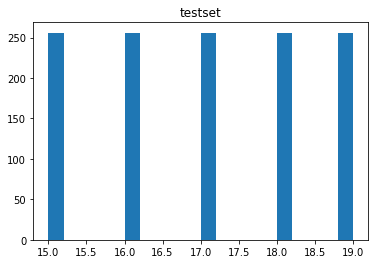

min/max : 15 19


In [9]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [13]:
#print(len(dataset.train))
#print(len(dataset.val))
#print(len(dataset.test))

print(dataset.train[0]["ndata_schemes"])
# print(dataset.val[0])
# print(dataset.test[0])


AttributeError: 'tuple' object has no attribute 'ndata_schemes'

In [ ]:
start = time.time()
with open('data/graphtheoryprop/GraphTheoryProp'+'.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
print('Time (sec):',time.time() - start)


Time (sec): 6.707483291625977


# Test load function

In [ ]:
DATASET_NAME = 'GraphTheoryProp'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset GraphTheoryProp...
train, test, val sizes : 5120 1280 640
[I] Finished loading.
[I] Data load time: 7.1912s


AttributeError: 'GraphTheoryPropDGL' object has no attribute 'data'

In [ ]:
batch_size = 10
collate = GraphTheoryPropDataset.collate
print(GraphTheoryPropDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.graphtheoryprop.GraphTheoryPropDataset'>
